# Airbnb - Project

As Airbnb has grown in popularity, it has increasingly become the focus of regulations designed to limit the number of properties listed in each city.

You have been asked to analyze the Paris listings, with focus on pricing. Leadership wants a visual summary of factors affecting  pricing and whether reulations adopted in 2015 impacted listing in the paris market.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
# Importing the data as CSV from file since the column name has special characters encoding the dataset as latin
listing_data = pd.read_csv(r'C:\\Users\\arunk\\OneDrive\\Documents\\Airbnb Data\\Listings.csv',encoding='latin1')


C:\Users\arunk\AppData\Local\Temp\ipykernel_2956\1672468950.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_data = pd.read_csv(r'C:\\Users\\arunk\\OneDrive\\Documents\\Airbnb Data\\Listings.csv',encoding='latin1')


In [3]:
listing_data.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
# coverting column host_since to datetime type
listing_data['host_since'] = pd.to_datetime(listing_data['host_since'])

In [8]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#### As per the objective we will be diving into the properties listed in Paris to study the effect of the bill on listings and price.

In [10]:
# Filter the required data where city is Paris
paris_df = listing_data[listing_data['city'] == 'Paris']

In [11]:
# Find the number of columns and rows
paris_df.shape

(64690, 33)

In [12]:
paris_df.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [226]:
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64594 entries, 0 to 279711
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64594 non-null  int64         
 1   name                         64594 non-null  object        
 2   host_id                      64594 non-null  int64         
 3   host_since                   64594 non-null  datetime64[ns]
 4   host_location                64459 non-null  object        
 5   host_response_time           23344 non-null  object        
 6   host_response_rate           23344 non-null  float64       
 7   host_acceptance_rate         31916 non-null  float64       
 8   host_is_superhost            64594 non-null  object        
 9   host_total_listings_count    64594 non-null  float64       
 10  host_has_profile_pic         64594 non-null  object        
 11  host_identity_verified       64594 non-n

In [225]:
# Find the mean, median, and standard deviation for the paris data
paris_df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_year,host_month
count,6.459400e+04,6.459400e+04,23344.000000,31916.000000,64594.000000,64594.000000,64594.000000,64594.000000,51220.000000,64594.000000,...,6.459400e+04,47991.000000,47944.000000,47953.000000,47927.000000,47946.000000,47926.000000,47927.000000,64594.000000,64594.000000
mean,2.425537e+07,8.804665e+07,0.859159,0.806731,11.749745,48.864196,2.345282,3.038208,1.369075,113.131421,...,8.509965e+02,93.064991,9.595194,9.206452,9.686920,9.713031,9.685473,9.276629,2015.348701,6.376846
std,1.432455e+07,1.049096e+08,0.280422,0.302408,71.367488,0.018330,0.033272,1.588569,0.952953,214.571852,...,3.935088e+04,8.944207,0.847034,1.107371,0.775507,0.767640,0.702077,0.943003,2.359858,3.202932
min,2.577000e+03,2.626000e+03,0.000000,0.000000,0.000000,48.813170,2.228680,0.000000,1.000000,0.000000,...,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2008.000000,1.000000
25%,1.183856e+07,1.274923e+07,0.890000,0.750000,1.000000,48.850860,2.324310,2.000000,1.000000,59.000000,...,3.000000e+01,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,2014.000000,4.000000
50%,2.397598e+07,3.740520e+07,1.000000,0.970000,1.000000,48.865470,2.348180,2.000000,1.000000,80.000000,...,1.125000e+03,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,2015.000000,6.000000
75%,3.722746e+07,1.318064e+08,1.000000,1.000000,2.000000,48.879100,2.370440,4.000000,2.000000,120.000000,...,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2017.000000,9.000000
max,4.809185e+07,3.876640e+08,1.000000,1.000000,1105.000000,48.904910,2.467050,16.000000,50.000000,12000.000000,...,1.000000e+07,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2021.000000,12.000000


#### Observation
- We observe a quarter of the data from listings is of Paris.
- Most of the columns have non-null values.
- Section 1 : We will focus more on columns accommodates, price,room type, host_id.


In [227]:
paris_df[['host_id','property_type','room_type','accommodates','price']].describe()

,host_id,accommodates,price
count,6.459400e+04,64594.000000,64594.000000
mean,8.804665e+07,3.038208,113.131421
std,1.049096e+08,1.588569,214.571852
min,2.626000e+03,0.000000,0.000000
25%,1.274923e+07,2.000000,59.000000
50%,3.740520e+07,2.000000,80.000000
75%,1.318064e+08,4.000000,120.000000
max,3.876640e+08,16.000000,12000.000000


#### Observation
- We can see there are cases where accommodations is 0 and price are also zero. We will further exam these dimensions to find the reason.
- There is discrepency with price this could be due to human error else we will need to investigate further.

### Handling Null values

In [13]:
# Find all null values in the paris dataframe
paris_df.isnull().sum()

listing_id                         0
name                              63
host_id                            0
host_since                        33
host_location                    168
host_response_time             41344
host_response_rate             41344
host_acceptance_rate           32771
host_is_superhost                 33
host_total_listings_count         33
host_has_profile_pic              33
host_identity_verified            33
neighbourhood                      0
district                       64690
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bedrooms                       13404
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
review_scores_rating           16654
review_scores_accuracy         16701
r

#### Observation
We see that majority of the columns has null values, we can drop district.

In [14]:
null_name = paris_df[paris_df['name'].isnull()]

In [15]:
null_name.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
388,4661616,NaN,24121498,2014-11-24,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,1125,90.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1260,11811541,NaN,62910102,2016-03-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,1125,100.0,10.0,10.0,10.0,10.0,9.0,10.0,f
1441,12355699,NaN,66731989,2016-04-11,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,93.0,9.0,9.0,10.0,10.0,10.0,10.0,f
2047,6076734,NaN,31542193,2015-04-19,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,4,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2439,9102328,NaN,37083488,2015-06-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


### drop null values in name column

In [16]:
paris_df = paris_df.dropna(subset=['name'])

In [17]:
paris_df['name'].isnull().sum()

0

In [18]:
paris_df[paris_df['host_location'].isnull()]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
11822,10873534,In the heart of medieval Paris.,53441371,2016-01-05,NaN,NaN,NaN,0.71,f,1.0,...,2,1125,92.0,10.0,9.0,10.0,10.0,10.0,9.0,f
12100,20008905,TrÃÂ¨s lumineux deux piÃÂ¨ces Montparnasse D...,73746551,2016-05-24,NaN,NaN,NaN,0.80,t,1.0,...,3,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f
12322,33575349,Appartement bassin la villette 2 chambres - metro,67732695,2016-04-18,NaN,NaN,NaN,0.00,f,1.0,...,3,1125,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
13239,38283030,Cosy studio for two guests,112741505,2017-01-22,NaN,NaN,NaN,1.00,t,1.0,...,4,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
13650,43979035,Charmant deux piÃÂ¨ces prÃÂ¨s de Montmartre,64165161,2016-03-23,NaN,NaN,NaN,1.00,f,1.0,...,5,1125,100.0,10.0,8.0,10.0,10.0,10.0,10.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262272,41835292,"Great location, Cozy appartement great for 2",49142951,2015-11-16,NaN,within an hour,1.0,0.79,f,1.0,...,3,30,80.0,9.0,6.0,10.0,10.0,10.0,9.0,f
265116,18689601,Grand angle sur Beaumarchais,91152356,2016-08-21,NaN,within a few hours,1.0,1.00,f,1.0,...,4,14,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f
266082,22056595,Charmant 2 piÃÂ¨ces 17eme Levis/Monceau,96541755,2016-09-24,NaN,within a day,1.0,1.00,t,1.0,...,3,8,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f
266988,38955136,Charmant studio Gare Saint Lazare,74038816,2016-05-25,NaN,a few days or more,0.0,1.00,f,1.0,...,2,30,85.0,10.0,9.0,10.0,10.0,10.0,9.0,t


In [19]:
paris_df['name'].nunique()

60791

In [20]:
paris_df['name'].count()

64627

In [21]:
paris_df.duplicated().sum()

0

In [22]:
# find duplicates in name
name_counts = paris_df['name'].value_counts()

# filter the name that have duplicates
duplicate_names = name_counts[name_counts > 1]

In [23]:
duplicate_names.count()

1892

In [24]:
duplicate_names.head()

studio                                           29
Charmant studio au coeur de Paris                26
Charming flat in the heart of Paris              20
RARE - Gorgeous Apartment in the Haut-Marais!    19
charmant appartement parisien                    19
Name: name, dtype: int64

In [25]:
paris_df[paris_df['name'] == 'studio'].head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
5280,7087347,studio,37148250,2015-06-30,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,1125,80.0,10.0,6.0,10.0,8.0,10.0,10.0,f
5321,28114171,studio,175845463,2018-02-28,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
5584,6830862,studio,35784312,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
6648,21453114,studio,61404343,2016-03-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,1125,40.0,6.0,6.0,6.0,5.0,10.0,6.0,t
6838,9633828,studio,49822311,2015-11-24,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


Based on our finding we can consider to drop duplicates in name if name, host id, host_since are same

In [26]:
# filter data based on the mentioned column names
name_dup_check = paris_df[['name','host_id','host_since']].value_counts()

In [27]:
name_dup_check_filter = name_dup_check[name_dup_check > 1].reset_index().rename(columns={0:'count'}) 

In [28]:
name_dup_check_filter

,name,host_id,host_since,count
0,RARE - Gorgeous Apartment in the Haut-Marais!,147018685,2017-08-21,19
1,Gorgeous studio in the Haut-Marais,147018685,2017-08-21,15
2,Gorgeous Apartment in the Haut-Marais!,147018685,2017-08-21,12
3,Balcony view on Tour Eiffel - Luxury room,17037121,2014-06-20,12
4,RARE - Gorgeous Studio close from NATION!,147018685,2017-08-21,10
...,...,...,...,...
217,Welcoming room near St Martin Canal,183489963,2018-04-10,2
218,Amazing apartment 2BR/6P - Gare de Lyon,373582561,2020-10-28,2
219,SUPER CENTRAL 2 PARIS : double room with balcony,3002613,2012-07-20,2
220,Exceptionnel ÃÂ Paris,64192280,2016-03-23,2


In [29]:
paris_df['is_duplicate'] = paris_df.duplicated(subset=['name', 'host_id', 'host_since'], keep='first')

In [30]:
paris_df[paris_df['is_duplicate'] == True]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_duplicate
32599,35900563,Ã¢Ëâ¬Ã¯Â¸Â Superb T2 - 4 people - Full cent...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,91.0,10.0,9.0,10.0,9.0,10.0,9.0,f,True
33018,6976744,Studio 18mÃÂ² Paris 16ÃÂ¨me (Auteuil),36585642,2015-06-24,"Paris, Ile-de-France, France",within a few hours,1.0,0.67,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,True
33465,40234541,Elegant apartment in the Quartier Latin,149392132,2017-09-06,"Paris, Ile-de-France, France",a few days or more,0.0,0.67,t,1.0,...,1125,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,True
37114,46775611,Cosy Parisian Apartment,140762005,2017-07-16,GB,within an hour,0.8,0.78,f,3.0,...,1125,80.0,8.0,8.0,10.0,10.0,10.0,9.0,f,True
38594,45871133,Cosy Parisian Apartment,140762005,2017-07-16,GB,within an hour,0.8,0.78,f,3.0,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274235,42779378,"Le calme au coeur de Paris, sans vis ÃÂ vis.",20877887,2014-09-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,True
274907,25046783,STUDIO DANS ARRIERE COUR PAVEE ET ARBORÃâ°E,159879933,2017-11-23,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,11,89.0,9.0,8.0,9.0,9.0,10.0,9.0,t,True
275572,26705350,Charmant studio ÃÂ 2 pas des Champs-Elysees,65105024,2016-03-30,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,100.0,10.0,10.0,10.0,10.0,10.0,8.0,f,True
276015,26803897,An architect flat at Republique/Canal Saint Ma...,19892671,2014-08-12,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,14,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,True


In [31]:
paris_df[paris_df['host_id'] == 245548775]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_duplicate
31699,39595555,Ã¢Ëâ¬Ã¯Â¸Â Superb T2 - 4 people - Full cent...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,91.0,9.0,9.0,9.0,9.0,10.0,9.0,t,False
31700,44162820,Ã°Å¸Â¥Â Superb studio - Full heart of Paris -...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,90.0,9.0,9.0,9.0,9.0,10.0,9.0,t,False
31842,37314111,Ã¢Ëâ¬Ã¯Â¸ÂBeautiful apartment in the heart ...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,94.0,10.0,9.0,9.0,10.0,10.0,9.0,t,False
31843,37344100,Ã¢ÂÂ¤Ã¯Â¸Â Unique studio with Seine view- 4 ...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,94.0,10.0,9.0,9.0,10.0,10.0,9.0,t,False
31860,44162946,Ã°Å¸Â¥Â Magnificent 3BDR in the heart of Pari...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,91.0,9.0,9.0,9.0,10.0,10.0,9.0,t,False
32057,47591158,Ã¢Ëâ¦ Splendid apartment - Full center Paris...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,False
32059,47949929,Ã¢ÂÂ¤Ã¯Â¸Å½Magnificent Apartment overlooking ...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,False
32523,32657876,Ã¢Ëâ¬Ã¯Â¸ÂDelightfull apartment - Paris Mar...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,88.0,9.0,9.0,9.0,9.0,10.0,9.0,t,False
32533,39596071,Ã¢Ëâ¬Ã¯Â¸Â Your secret place - Le Marais - ...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,False
32547,47590296,Ã¢Ëâ¦ Superb T2 Ideally located in the cente...,245548775,2019-02-26,"Paris, Ile-de-France, France",within an hour,1.0,0.97,f,1.0,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,False


In [32]:
paris_df_filtered = paris_df[~paris_df['is_duplicate']].drop(columns='is_duplicate')


In [33]:
### relook duplicates in name

In [34]:
paris_df['host_id'].value_counts()

291007369    627
6053288      241
2667370      236
33889201     215
325882341    199
            ... 
3903296        1
219697137      1
6423541        1
55287729       1
6955618        1
Name: host_id, Length: 51895, dtype: int64

In [35]:
paris_df['host_location'].unique()

array(['Paris, Ile-de-France, France', 'Hericy, Ile-de-France, France',
       'Montreuil, Ile-de-France, France', ..., 'Grand Est, France',
       'Long Beach, California, United States',
       'Saint-Jean-de-Fos, Occitanie, France'], dtype=object)

In [36]:
paris_df[paris_df['host_location'] == 'California']

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_duplicate
195661,8181428,Charming and Clean Parisian Room,29535485,2015-03-17,California,NaN,NaN,NaN,f,2.0,...,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,False
259050,898801,A romantic Parisian apartment,4797658,2013-01-21,California,NaN,NaN,1.0,f,1.0,...,365,91.0,9.0,9.0,9.0,9.0,10.0,9.0,f,False


#### Observations
Our study indicates there are no potential duplicated rows in the data frame. There are duplicate names, host id etc these are logical since property names can be same in different places and host id can also be present since multiple properties are owned by hosts.

In [37]:
paris_df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_duplicate'],
      dtype='object')

### EDA

In [229]:
# Find the number of properties listed in each neighbourhood in Paris

In [233]:
neighbourhood_count = paris_df['neighbourhood'].value_counts().reset_index().rename(columns={'index':'neighbourhood','neighbourhood':'count'}).sort_values(by='count',ascending=False)

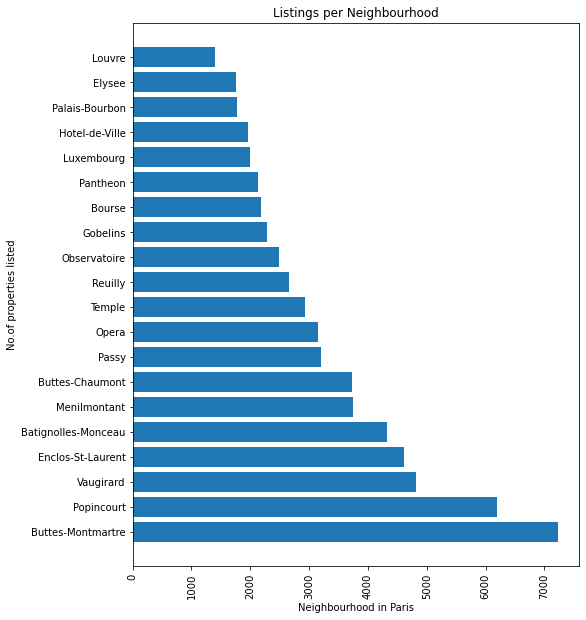

In [236]:
# Plot the listings per neighbourhood in a horizontal bar chart
plt.figure(figsize=(8,10))
plt.barh(neighbourhood_count['neighbourhood'],neighbourhood_count['count'])
plt.xlabel('Neighbourhood in Paris')
plt.ylabel('No.of properties listed')
plt.title('Listings per Neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [40]:
# average pricing in paris
avg_price = round(paris_df['price'].mean(),2)
avg_price

113.12

#### Find the average price by neighbourhood and list the 5 most expensive neigbourhoods

In [41]:
nbhood = paris_df[['neighbourhood','price']]

In [42]:
nbhood_price = round(nbhood.groupby('neighbourhood')['price'].mean(),2).reset_index().sort_values(by='price',ascending=False)

In [43]:
nbhood_price.head()

,neighbourhood,price
4,Elysee,210.68
8,Louvre,175.38
15,Passy,161.26
13,Palais-Bourbon,156.93
9,Luxembourg,155.64


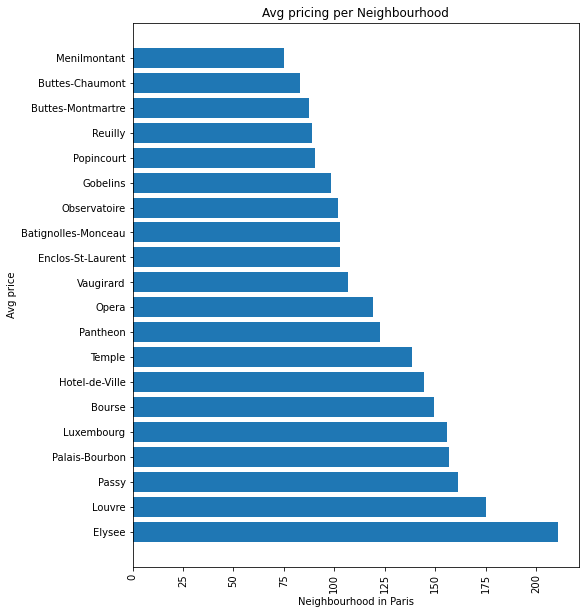

In [238]:
# plot the bar
plt.figure(figsize=(8,10))
plt.barh(nbhood_price['neighbourhood'],nbhood_price['price'])
plt.xlabel('Neighbourhood in Paris')
plt.ylabel('Avg price')
plt.title('Avg pricing per Neighbourhood')
plt.xticks(rotation=90)
plt.show()

We can create a suplot to understand how increase in prices leads to lower bookings

In [45]:
paris_df['host_id'].nunique()

51895

In [46]:
paris_df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_duplicate
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,False
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,False


In [47]:
paris_df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_duplicate'],
      dtype='object')

In [48]:
property_type_bookings = paris_df['property_type'].value_counts().reset_index().rename(columns={'index':'property_type','property_type':'count'}).head(10)

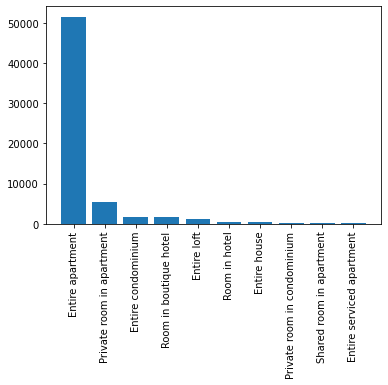

In [49]:
plt.bar(x=property_type_bookings['property_type'],height=property_type_bookings['count'])
plt.xticks(rotation=90)
plt.show()

Observation : This show most properties listed in Airbnb are apartments

In [50]:
paris_df = paris_df.dropna(subset=['host_since'])

In [51]:
paris_df['host_since'].isnull().sum()

0

In [239]:
# Data transformation to extract Year and Month

In [52]:
paris_df['host_year'] = paris_df['host_since'].dt.year

In [53]:
paris_df['host_month'] = paris_df['host_since'].dt.month

In [54]:
paris_df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_duplicate,host_year,host_month
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,False,2011,12
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,False,2013,11
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,False,2014,7
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,False,2013,12
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,False,2014,12


#### List the number of properties hosted each year

In [106]:
listings_by_year = paris_df['host_year'].value_counts().reset_index().rename(columns={'index':'host_year','host_year':'count'})

In [107]:
listings_by_year = listings_by_year.sort_values(by='host_year',ascending=True)

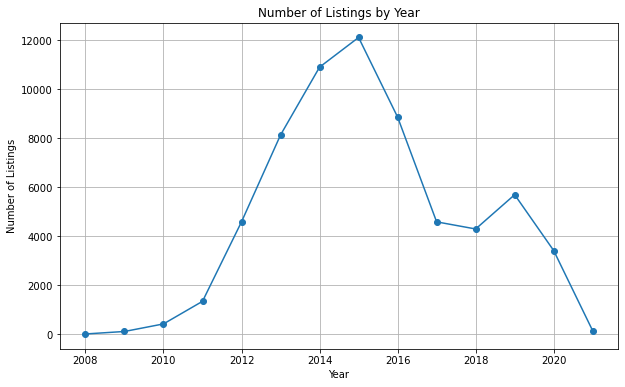

In [108]:
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(listings_by_year['host_year'], listings_by_year['count'], marker='o', linestyle='-')
plt.title('Number of Listings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

The chart clearly indicates the number of listings has decreased since 2015.

#### Find the average price of properties listed each year

In [152]:
# We will now see the average yearly pricing
avg_price_listed_by_year = round(paris_df.groupby('host_year')['price'].mean(),2).reset_index()

#paris_df.groupby('host_year').agg({'price':'mean','host_year':'count'})

avg_price_listed_by_year

,host_year,price
0,2008,77.75
1,2009,159.64
2,2010,125.20
3,2011,124.86
4,2012,111.56
5,2013,107.12
6,2014,100.29
7,2015,103.71
8,2016,114.13
9,2017,108.66


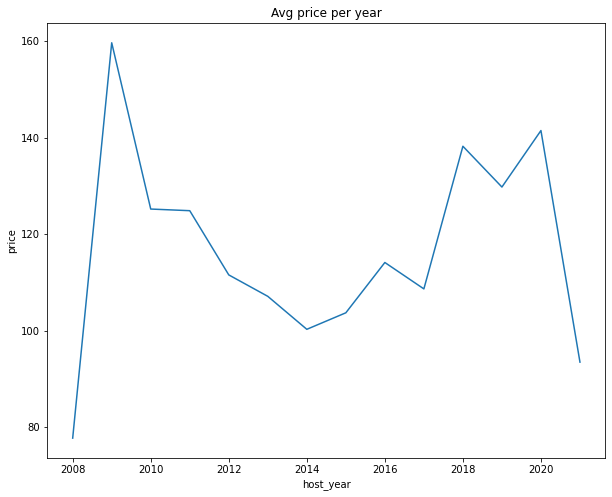

In [155]:
# Plot the Average price by Year
plt.figure(figsize=(10,8))
sns.lineplot(data = avg_price_listed_by_year, x=avg_price_listed_by_year['host_year'],y=avg_price_listed_by_year['price'])
plt.title('Avg price per year')
plt.show()

In [240]:
# Create a dual axis chart to study the properties listed yearly against the average pricing

In [156]:
avg_price_listed_by_year2 = paris_df.groupby('host_year').agg(
    avg_price=('price', 'mean'),
    count=('host_year', 'size')
).reset_index()

In [157]:
avg_price_listed_by_year2

,host_year,avg_price,count
0,2008,77.750000,4
1,2009,159.641509,106
2,2010,125.197590,415
3,2011,124.861734,1338
4,2012,111.556791,4587
5,2013,107.122926,8135
6,2014,100.294700,10906
7,2015,103.712518,12119
8,2016,114.132980,8866
9,2017,108.658888,4585


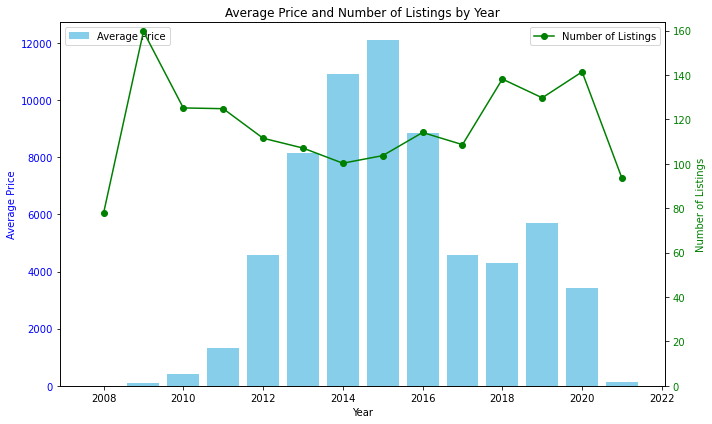

In [169]:
# Create dual axis by creating subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a barplot 
ax1.bar(avg_price_listed_by_year2['host_year'], avg_price_listed_by_year2['count'], color='skyblue', label='Average Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.plot(avg_price_listed_by_year2['host_year'], avg_price_listed_by_year2['avg_price'], color='green', marker='o', linestyle='-', label='Number of Listings')
ax2.set_ylabel('Number of Listings', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title
plt.title('Average Price and Number of Listings by Year')

# Add a legend
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax2.set_ylim(0)
# Show the plot
plt.show()

In [171]:
paris_df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_duplicate', 'host_year', 'host_month'],
      dtype='object')

#### FInd the different types of accommodations available in Airbnb and the most common listngs

In [173]:
paris_df['accommodates'].unique()

array([ 2,  4,  3,  1,  5,  6,  7,  8,  9, 10, 14, 11, 12, 13, 15, 16,  0],
      dtype=int64)

In [177]:
paris_df['accommodates'].value_counts().reset_index().sort_values('accommodates')

,index,accommodates
16,13,19
15,15,24
14,14,26
13,16,33
12,11,34
11,0,54
10,12,76
9,9,89
8,10,201
7,7,470


#### FInd different accommodations type vs average price

In [182]:
avg_price_per_accommoation = paris_df.groupby('accommodates').agg(avg_price = ('price','mean')).reset_index()
avg_price_per_accommoation

,accommodates,avg_price
0,0,0.000000
1,1,64.855247
2,2,84.108016
3,3,98.252181
4,4,126.017166
5,5,165.139629
6,6,217.206975
7,7,261.065957
8,8,325.022440
9,9,380.685393


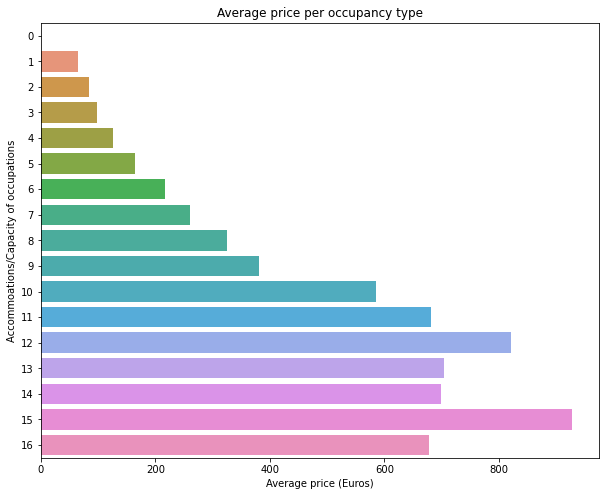

In [191]:
plt.figure(figsize=(10,8))
sns.barplot(data=avg_price_per_accommoation,
            x=avg_price_per_accommoation['avg_price'],
            y=avg_price_per_accommoation['accommodates'],
           orient='h')
plt.xlabel('Average price (Euros)')
plt.ylabel('Accommoations/Capacity of occupations')
plt.title('Average price per occupancy type')
plt.show()

In [195]:
nbhood2 = paris_df[['neighbourhood','price','accommodates']]

In [196]:
nbhood2

,neighbourhood,price,accommodates
0,Buttes-Montmartre,53,2
1,Buttes-Montmartre,120,2
2,Elysee,89,2
3,Vaugirard,58,2
4,Passy,60,2
...,...,...,...
279707,Observatoire,120,2
279708,Buttes-Montmartre,60,2
279709,Buttes-Montmartre,50,2
279710,Popincourt,105,2


In [200]:
pricey_nbhood = nbhood2[nbhood2['neighbourhood']=='Elysee']
pricey_nbhood.head()

,neighbourhood,price,accommodates
2,Elysee,89,2
14,Elysee,35,2
128,Elysee,75,2
137,Elysee,90,2
260,Elysee,110,2


In [219]:
pricey_nbhood_elysee = pricey_nbhood.groupby('accommodates').agg({'price':'mean','neighbourhood':'count'}).reset_index().sort_values(by='accommodates',ascending=False)
pricey_nbhood_elysee.head()

,accommodates,price,neighbourhood
15,16,800.000,1
14,14,971.000,2
13,13,842.500,2
12,12,529.625,8
11,11,805.000,4


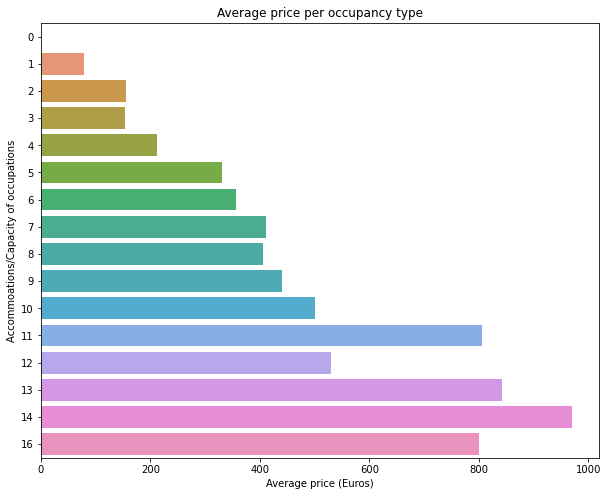

In [221]:
plt.figure(figsize=(10,8))
sns.barplot(data=pricey_nbhood_elysee,
            x=pricey_nbhood_elysee['price'],
            y=pricey_nbhood_elysee['accommodates'],
           orient='h')
plt.xlabel('Average price (Euros)')
plt.ylabel('Accommoations/Capacity of occupations')
plt.title('Average price per occupancy type')
plt.show()

### Summary

- The data consists of more than 2 Million rows and 33 columns. As per the objective we have transformed the data to fetch only the listings hosted in Paris.
- The data had almost 65K rows and had missing values.

###### Objective - How has the bill passed in 2015 effected the market, pricing and properties listed in Airbnb.

1. Airbnb had launched in 2008 in Paris and started with only 4 properties but saw rapid growth till 2015. One of the key observations was as the number of properties increased the prices also decreased.
2. Post implementing the bill we saw a decrease in the number of properties hosted in Airbnb for the first time since inception this also impacted the owners who were unable to host the properties and had to limit the properties hosted this saw an significant increase in the prices. In 2020 the prices hit all time high of 140 Euros.

##### Effect on Neighbourhood
1. There are some very rich neighbourhood which offers a high number of occupancy, and these are tourist attractions. Hence, the prices of some neighbourhoods is very high compared to the average price in Price.
2. As the accommodation capacity increase the prices also increased.
3. In addition the 80% of properties listed accommodates less than 5 people.

### Executive summary
Our study shows the implementation of bill in 2015 has effected the overall realestate market. The number of properties listed has decreased in Airbnb which has led to significant impact on the price and increased more than average price.